In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
summa = xr.open_dataset('template_output_harts_SNTL_WY23_timestep.nc')
summa = summa.to_dataframe().reset_index()
summa['time'] = pd.to_datetime(summa['time'])
summa.set_index('time', inplace=True)

obs = pd.read_csv('../processing/methow/harts_met_WY23.csv')

# obs = obs[obs['Date_Time'] > '2023-10-17'] 

obs.rename(columns={'Date_Time':'time', 'AirTC_Avg':'airtemp', 'RH':'rh', 'WS_ms_S_WVT':'windspd', 
                    'WindDir_D1_WVT':'winddir', 'snow_water_equiv_set_1':'swe', 'snow_depth_set_1':'snowdepth'}, inplace=True)
obs['time'] = pd.to_datetime(obs['time'])
# obs['time'] = obs['time'].dt.strftime('%Y-%m-%d %H:%M:%S')

obs.set_index('time', inplace=True)


In [3]:
obs.loc[obs['snowdepth'] > 3000, 'snowdepth'] = np.nan
obs['snowdepth'] = obs['snowdepth'].interpolate(method='linear')

obs['snowdepth'] = obs['snowdepth']/1000
obs['density'] = obs['swe']/obs['snowdepth']

obs.loc[obs['density'] > 700, 'density'] = np.nan
obs['density'] = obs['density'].interpolate(method='linear')




In [4]:
harts_jrdn = xr.open_dataset('./template_output_harts_jrdn_WY23_timestep.nc')
harts_2K = xr.open_dataset('./template_output_harts_+2K_WY23_timestep.nc')
harts_4K = xr.open_dataset('./template_output_harts_+4K_WY23_timestep.nc')
harts_6K = xr.open_dataset('./template_output_harts_+6K_WY23_timestep.nc')
harts_jrdn

<xarray.Dataset> Size: 45MB
Dimensions:                    (time: 6889, hru: 1, gru: 1, midToto: 109,
                                midSoil: 9, ifcToto: 110)
Coordinates:
  * time                       (time) datetime64[ns] 55kB 2022-10-01 ... 2023...
  * hru                        (hru) int64 8B 1001
  * gru                        (gru) int64 8B 1001
Dimensions without coordinates: midToto, midSoil, ifcToto
Data variables: (12/51)
    pptrate                    (time, hru) float64 55kB ...
    airtemp                    (time, hru) float64 55kB ...
    SWRadAtm                   (time, hru) float64 55kB ...
    LWRadAtm                   (time, hru) float64 55kB ...
    averageInstantRunoff       (time, gru) float64 55kB ...
    averageRoutedRunoff        (time, gru) float64 55kB ...
    ...                         ...
    scalarSoilBaseflow         (time, hru) float64 55kB ...
    scalarAquiferBaseflow      (time, hru) float64 55kB ...
    scalarTotalRunoff          (time, hru) float64 55kB ...
    scalarNetRadiation         (time, hru) float64 55kB ...
    hruId                      (hru) int64 8B ...
    gruId                      (gru) int64 8B ...
Attributes: (12/34)
    summaVersion:     v3.1.2
    buildTime:        Fri 10 Feb 2023 02:32:58 PM UTC
    gitBranch:        master-0-gfa9adf8
    gitHash:          fa9adf808229a45085defdc2bb8ef05836b9b3aa
    soilCatTbl:       ROSETTA
    vegeParTbl:       MODIFIED_IGBP_MODIS_NOAH
    ...               ...
    compaction:       anderson
    thCondSnow:       smnv2000
    thCondSoil:       funcSoilWet
    spatial_gw:       localColumn
    subRouting:       timeDlay
    snowDenNew:       pahaut_76

Text(0.5, 1.0, 'Harts Pass Bulk Density WY23')

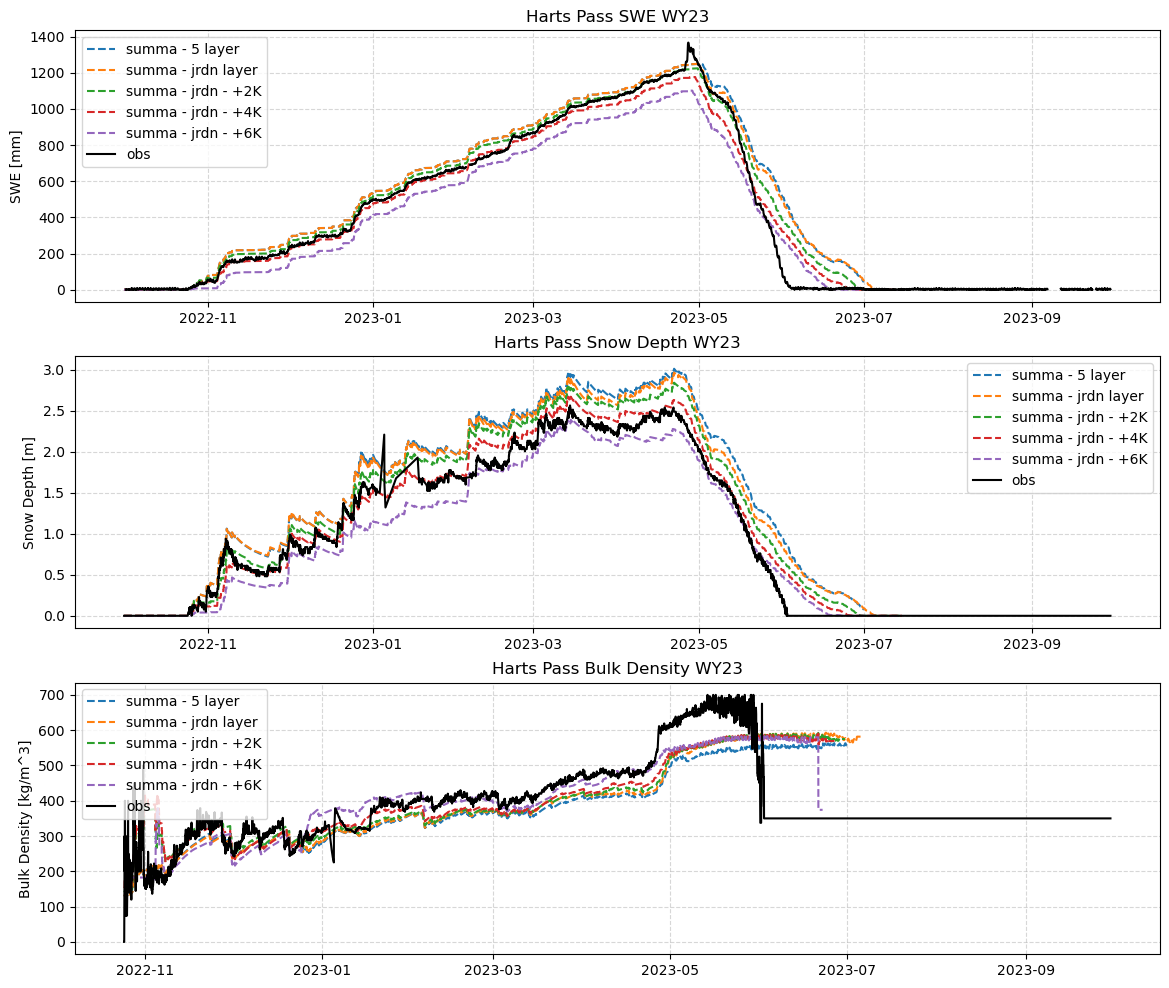

In [7]:
fig, ax = plt.subplots(3, 1, figsize=(14, 12))

ax[0].plot(summa.index, summa['scalarSWE'], label='summa - 5 layer', ls='--')
ax[0].plot(harts_jrdn.time, harts_jrdn['scalarSWE'], label='summa - jrdn layer', ls='--')
ax[0].plot(harts_2K.time, harts_2K['scalarSWE'], label='summa - jrdn - +2K', ls='--')
ax[0].plot(harts_4K.time, harts_4K['scalarSWE'], label='summa - jrdn - +4K', ls='--')
ax[0].plot(harts_6K.time, harts_6K['scalarSWE'], label='summa - jrdn - +6K', ls='--')
ax[0].plot(obs.index, obs['swe'], label='obs', color='k')
ax[0].grid(ls='--', alpha=0.5)
ax[0].legend()
ax[0].set_ylabel('SWE [mm]')
ax[0].set_title('Harts Pass SWE WY23')

ax[1].plot(summa.index, summa['scalarSnowDepth'], label='summa - 5 layer', ls='--')
ax[1].plot(harts_jrdn.time, harts_jrdn['scalarSnowDepth'], label='summa - jrdn layer', ls='--')
ax[1].plot(harts_2K.time, harts_2K['scalarSnowDepth'], label='summa - jrdn - +2K', ls='--')
ax[1].plot(harts_4K.time, harts_4K['scalarSnowDepth'], label='summa - jrdn - +4K', ls='--')
ax[1].plot(harts_6K.time, harts_6K['scalarSnowDepth'], label='summa - jrdn - +6K', ls='--')
ax[1].plot(obs.index, obs['snowdepth'], label='obs', color='k')
ax[1].grid(ls='--', alpha=0.5)
ax[1].legend()
ax[1].set_ylabel('Snow Depth [m]')
ax[1].set_title('Harts Pass Snow Depth WY23')

ax[2].plot(summa.index, summa['scalarSWE']/summa['scalarSnowDepth'], label='summa - 5 layer', ls='--')
ax[2].plot(harts_jrdn.time, harts_jrdn['scalarSWE']/harts_jrdn['scalarSnowDepth'], label='summa - jrdn layer', ls='--')
ax[2].plot(harts_2K.time, harts_2K['scalarSWE']/harts_2K['scalarSnowDepth'], label='summa - jrdn - +2K', ls='--')
ax[2].plot(harts_4K.time, harts_4K['scalarSWE']/harts_4K['scalarSnowDepth'], label='summa - jrdn - +4K', ls='--')
ax[2].plot(harts_6K.time, harts_6K['scalarSWE']/harts_6K['scalarSnowDepth'], label='summa - jrdn - +6K', ls='--')
ax[2].plot(obs.index, obs['density'], label='obs', color='k')
ax[2].grid(ls='--', alpha=0.5)
ax[2].legend()
ax[2].set_ylabel('Bulk Density [kg/m^3]')
ax[2].set_title('Harts Pass Bulk Density WY23')

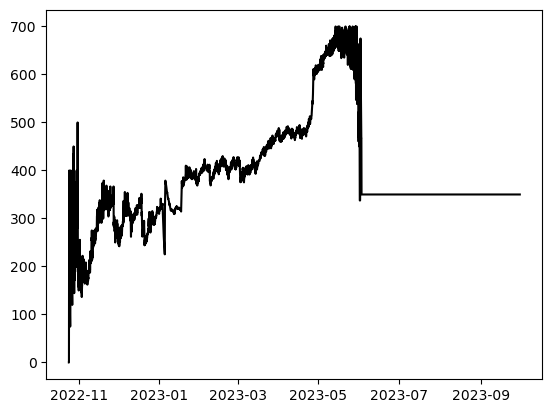

In [5]:
fig, ax = plt.subplots()

ax.plot(obs.index, obs['density'], label='obs', color='k')

In [12]:
path = '/Users/clintonalden/Documents/Research/summa_work/model/forcings/salmon_WY23.nc'
force = xr.open_dataset(path)
force

<xarray.Dataset> Size: 630kB
Dimensions:     (time: 8745, hru: 1)
Coordinates:
  * time        (time) datetime64[ns] 70kB 2022-10-01 ... 2023-09-30T08:00:00
Dimensions without coordinates: hru
Data variables:
    airtemp     (time, hru) float64 70kB ...
    pptrate     (time, hru) float64 70kB ...
    airpres     (time, hru) float64 70kB ...
    spechum     (time, hru) float64 70kB ...
    SWRadAtm    (time, hru) float64 70kB ...
    LWRadAtm    (time, hru) float64 70kB ...
    windspd     (time, hru) float64 70kB ...
    gap_filled  (hru, time) float64 70kB ...
    data_step   float64 8B ...
    hruId       (hru) int32 4B ...

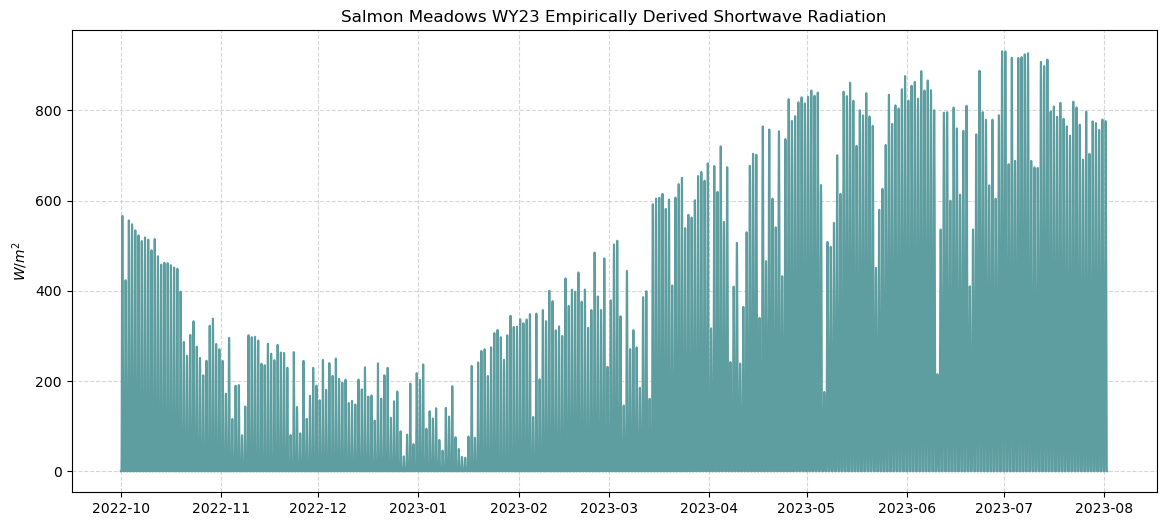

In [20]:


fig, ax = plt.subplots(1, 1, figsize=(14, 6))

subset_force = force.sel(time=slice(None, '2023-08-01'))

ax.plot(subset_force.time, subset_force.SWRadAtm, label='SWRadAtm', color='cadetblue')

ax.set_ylabel('$W/m^2$')
ax.set_title('Salmon Meadows WY23 Empirically Derived Shortwave Radiation')
ax.grid(ls='--', alpha=0.5)
